# GalaxyChop's Tutorial

This tutorial is a guide to use GalaxyChop package. GalaxyChop performs the dynamical decomposition of a galaxy with six different methods.

In this tutorial we show you step by step how to get started with the GalaxyChop package.

---------------------------------------------------------------------------------------------

## Import GalaxyChop and the necessary packages

In [1]:
import numpy as np
import astropy.units as u
import galaxychop as gc

The first thing to do is to import the necessary packages:

* [numpy](https://numpy.org/): it is used to load the data.
* [astropy.units](https://docs.astropy.org/en/stable/units/): it is used to introduce the units to our data.
* **galaxychop**: it is the library that we present in this tutorial.

## Loading the data

For this tutorial, we use a preloaded dataset offered by GalaxyChop

The first step is to load mass (m), positions (x, y, z) and velocities (vx, vy, vz) of the galaxy.  The data must be include stars, dark matter and gas. If the user previously has calculated the potential energy (pot) of all particles (stars, dark matter and gas), it also can be introduced.

In [2]:
star = gc.dataset.load_star_394242()
dark = gc.dataset.load_dark_394242()
gas = gc.dataset.load_gas_394242()
pot_star = gc.dataset.load_pot_star_394242()
pot_dark = gc.dataset.load_pot_dark_394242()
pot_gas = gc.dataset.load_pot_gas_394242()

## Creating the galaxy


To create a `galaxy` object, the data **must be entered with units**. Masses in ${\rm M_{\odot}}$, positions in ${\rm kpc}$, velocities in ${\rm km/s}$ and potential energy in ${\rm (km/s)^2}$. (Note that the potential energy we use here is an specific potential energy). For this we use the package `units` from `astropy`

In [3]:
galaxy = gc.Galaxy(
    m_s = star[:,0]*u.M_sun,
    x_s = star[:,1]*u.kpc,
    y_s = star[:,2]*u.kpc, 
    z_s = star[:,3]*u.kpc,
    vx_s = star[:,4]*u.km / u.s,
    vy_s = star[:,5]*u.km / u.s,
    vz_s = star[:,6]*u.km / u.s,
    m_dm = dark[:,0]*u.M_sun,
    x_dm = dark[:,1]*u.kpc,
    y_dm = dark[:,2]*u.kpc,
    z_dm = dark[:,3]*u.kpc,
    vx_dm = dark[:,4]*u.km / u.s,
    vy_dm = dark[:,5]*u.km / u.s,
    vz_dm = dark[:,6]*u.km / u.s,
    m_g = gas[:,0]*u.M_sun,
    x_g = gas[:,1]*u.kpc,
    y_g = gas[:,2]*u.kpc,
    z_g = gas[:,3]*u.kpc,
    vx_g = gas[:,4]*u.km / u.s,
    vy_g = gas[:,5]*u.km / u.s,
    vz_g = gas[:,6]*u.km / u.s,
    pot_s = pot_star*(u.km / u.s)**2,
    pot_dm = pot_dark*(u.km / u.s)**2,
    pot_g = pot_gas*(u.km / u.s)**2
)

`galaxy` is now an instantiated object with the Galaxy class.

### Properties of `galaxy` object

There are a number of galaxy properties that we can calculate if necessary

* [Specific kinetical energy](https://galaxy-chop.readthedocs.io/en/latest/api/galaxychop.html#galaxychop.core.Galaxy.kinetic_energy)
* [Specific potential energy](https://galaxy-chop.readthedocs.io/en/latest/api/galaxychop.html#galaxychop.core.Galaxy.potential_energy)
* [Specific total energy](https://galaxy-chop.readthedocs.io/en/latest/api/galaxychop.html#galaxychop.core.Galaxy.energy)
* [Specific angular momentum](https://galaxy-chop.readthedocs.io/en/latest/api/galaxychop.html#galaxychop.core.Galaxy.angular_momentum)
* Pairs of points (x,y) used for interpolation of the [circular angular momentum](https://galaxy-chop.readthedocs.io/en/latest/api/galaxychop.html#galaxychop.core.Galaxy.jcirc) function
* [Circularity parameter](https://galaxy-chop.readthedocs.io/en/latest/api/galaxychop.html#galaxychop.core.Galaxy.paramcirc): in the z-axis and in the plane.

**Note**

In case it is not necessary to work or analyze any of the parameters mentioned above you can directly perform the dynamical decomposition. For this, you can proceed directly to the title **Dynamic decomposition methods**.

#### Specific total energy

In [4]:
E_s, E_dm, E_g = galaxy.energy

This returns the total specific energy of the components of stars (s), dark matter (dm) and gas (g). 
If you prefer separately specific kinetic and/or potential energy, you can run:

~~~
k_s, k_dm, k_g = galaxy.kinetic_energy
~~~

for kinetic energy, or:

~~~
gpot = galaxy.potential_energy()
gpot.pot_s, gpot.pot_dm, gpot.pot_g
~~~


for potential energy. 

**Note**

You must note that `kinetic_energy` is a property of the class `Galaxy`, and `potential_energy` is a method. This is implemented in that way to allow entering potentials manually if you prefer. For more details, see the documentation.

#### Specific angular momentum

In [5]:
J_part = galaxy.angular_momentum().J_part
J_star = galaxy.angular_momentum().J_star
Jr_part = galaxy.angular_momentum().Jr_part
Jr_star = galaxy.angular_momentum().Jr_star

This returns the parameters:

* **J_part**: Specific angular momentum of stars, dark matter and gas.
* **J_star**: Specific angular momentum for stars.
* **Jr_part**: Absolute value of the specific angular momentum in the XY plane of all particles (stars, dark matter and gas).
* **Jr_star**: Absolute value of the specific angular momentum in the XY plane of star particles.

#### Circular angular momentum

In [6]:
x = galaxy.jcirc().x
y = galaxy.jcirc().y

This returns a new galaxy with the parameters:

* **x**: Normalized specific energy for the particle with the maximum z-component of the normalized specific angular momentum per bin.
* **y**: Maximum value of the z-component of the normalized specific angular momentum per bin.

For more information, you can access the documentation of the jcirc method in the Notes section

#### Circularity parameters

In [7]:
E_star, eps, eps_r = galaxy.paramcirc

This returns the **normalized specific stellar energy**, **circularity parameter in z** and **circularity parameter in the plane**.

## Dynamic decomposition methods

In GalaxyChop we present 6 models to perform the dynamical decomposition of galaxies stellar component.

* **GCChop**
* **GCAbadi**
* **GCCristiani**
* **GCKmeans**
* **GCGmm**
* **GCAutogmm**

### [GCChop ](https://galaxy-chop.readthedocs.io/en/latest/api/galaxychop.html#galaxychop.models.GCChop)

This is an implementation of the method for galaxy dynamical decomposition used in [Tissera et al.(2012)](https://ui.adsabs.harvard.edu/abs/2012MNRAS.420..255T/abstract), [Vogelsberger et al.(2014)](https://ui.adsabs.harvard.edu/abs/2014MNRAS.444.1518V/abstract), [Marinacci et al.(2014)](https://ui.adsabs.harvard.edu/abs/2014MNRAS.437.1750M/abstract), [Park et al.(2019)](https://ui.adsabs.harvard.edu/abs/2019ApJ...883...25P/abstract), etc.

We instantiate an object with the class `GCChop`.

In [8]:
gcchop = gc.GCChop()

Next, we decompose the previously instantiated galaxy

In [9]:
gcchop.decompose(galaxy)

The previous method certifies that what we introduce an instantiated galaxy with the `Galaxy` class, and performs the decomposition.

Then, we obtain the component to which each galaxy particle belongs: 

In [10]:
gcchop.labels_

array([ 0,  0,  0, ...,  0, -1, -1])

Each label corresponds to a different galaxy stellar component. **See documentation for full description.**

### [GCAbadi](https://galaxy-chop.readthedocs.io/en/latest/api/galaxychop.html#galaxychop.models.GCAbadi)

This is an implementation of the method for galaxy dynamical decomposition described by [Abadi et al.(2003)](https://ui.adsabs.harvard.edu/abs/2003ApJ...597...21A/abstract).

First, we instantiate an object with the class `GCAbadi`.

In [11]:
gcabadi = gc.GCAbadi()

Next, we decompose the previously instantiated galaxy

In [12]:
gcabadi.decompose(galaxy)

The previous method certifies that what we introduce an instantiated galaxy with the `Galaxy` class, and performs the decomposition.

Then, we obtain the component to which each galaxy particle belongs:

In [13]:
gcabadi.labels_

array([ 1,  0,  1, ...,  0, -1, -1])

Each label corresponds to a different galaxy stellar component. **See documentation for full description.**

### [GCCristiani](https://galaxy-chop.readthedocs.io/en/latest/api/galaxychop.html#galaxychop.models.GCCristiani)

This is a variation of the method for galaxy dynamical decomposition implemented by [Abadi et al.(2003)](https://ui.adsabs.harvard.edu/abs/2003ApJ...597...21A/abstract).

We instantiate an object with the class `GCCristiani`.

In [14]:
gccristiani = gc.GCCristiani()

Next, we decompose the previously instantiated galaxy

In [15]:
gccristiani.decompose(galaxy)

The previous method certifies that what we introduce an instantiated galaxy with the `Galaxy` class, and performs the decomposition.

Then, we obtain the component to which each galaxy particle belongs:

In [16]:
gccristiani.labels_

array([ 0,  0,  0, ...,  0, -1, -1])

Each label corresponds to a different galaxy stellar component. **See documentation for full description.**

### [GCKmeans](https://galaxy-chop.readthedocs.io/en/latest/api/galaxychop.html#galaxychop.models.GCKmeans)

This is an implementation of [Skit-learn](https://scikit-learn.org/stable/about.html#citing-scikit-learn) K-means as a method for galaxy dynamical decomposition. 

First, we instantiate an object with the class `GCKmeans` by translating the amount of components that we want to obtain from the decomposition.

In [17]:
gckmeans = gc.GCKmeans(n_clusters=3)

Then, we decompose the previously instantiated galaxy.

In [18]:
gckmeans.decompose(galaxy)

GCKmeans()

This method certifies that what we introduce an instantiated galaxy with the `Galaxy` class, and performs the decomposition.

Then, we obtain the component to which each galaxy particle belongs:

In [19]:
gckmeans.labels_

array([ 2,  2,  1, ...,  2, -1, -1])

Each label corresponds to a different galaxy stellar component. **See documentation for full description.**

### [GCGmm](https://galaxy-chop.readthedocs.io/en/latest/api/galaxychop.html#galaxychop.models.GCGmm)

This is an implementation of the method for galaxy dynamical decomposition described by [Obreja et al.(2018)](https://ui.adsabs.harvard.edu/abs/2018MNRAS.477.4915O/abstract)

First, we instantiate an object with the class `GCgmm`.

In [20]:
gcgmm = gc.GCGmm(n_components=3)

Next, we decompose the previously instantiated galaxy

In [21]:
gcgmm.decompose(galaxy)

GCGmm()

The previous method certifies that what we introduce an instantiated galaxy with the `Galaxy` class, and performs the decomposition.

Then, we obtain the component to which each galaxy particle belongs:

In [22]:
gcgmm.labels_

array([ 1,  1,  2, ...,  1, -1, -1])

Each label corresponds to a different galaxy stellar component. **See documentation for full description.**

### [GCAutogmm](https://galaxy-chop.readthedocs.io/en/latest/api/galaxychop.html#galaxychop.models.GCAutogmm)

This is an implementation of the method for galaxy dynamical decomposition described by [Du et al.(2019)](https://ui.adsabs.harvard.edu/abs/2019ApJ...884..129D/abstract)

First, we instantiate an object with the class `GCAutogmm`.

In [23]:
gcautogmm = gc.GCAutogmm()

Next, we decompose the previously instantiated galaxy

In [24]:
gcautogmm.decompose(galaxy)

The previous method certifies that what we introduce an instantiated galaxy with the `Galaxy` class, and performs the decomposition.

Then, we obtain the component to which each galaxy particle belongs:

In [25]:
gcautogmm.labels_

array([ 1,  1,  1, ...,  0, -1, -1])

Each label corresponds to a different galaxy stellar component. **See documentation for full description.**

## View the data

To visualize the loaded data, we use the package [py-sphviewer](http://alejandrobll.github.io/py-sphviewer/content/tutorials.html) and [matplotlib](https://matplotlib.org/index.html) to plot the galaxy face-on and edge-on.

In [26]:
import matplotlib.pyplot as plt
from sphviewer.tools import QuickView

### View the galaxy

Fist, we must align the particles with respect to the z-component of the angular momentum of star particles. For this, we use the method `align` of `galaxychop`.

**Note**

When we used the method [align](https://galaxy-chop.readthedocs.io/en/latest/api/galaxychop.html#galaxychop.utils.align) we enter the value of the `galaxy` attributes using the array accessor `arr_`; i.e.: `galaxy.arr_.x_s` returns the value of `x_s` without units.

In [27]:
rot_part = gc.align(galaxy.arr_.m_s,
                    galaxy.arr_.x_s,
                    galaxy.arr_.y_s,
                    galaxy.arr_.z_s,
                    galaxy.arr_.vx_s,
                    galaxy.arr_.vy_s,
                    galaxy.arr_.vz_s,
                    galaxy.arr_.x_dm,
                    galaxy.arr_.y_dm,
                    galaxy.arr_.z_dm,
                    galaxy.arr_.vx_dm,
                    galaxy.arr_.vy_dm,
                    galaxy.arr_.vz_dm,
                    galaxy.arr_.x_g,
                    galaxy.arr_.y_g,
                    galaxy.arr_.z_g,
                    galaxy.arr_.vx_g,
                    galaxy.arr_.vy_g,
                    galaxy.arr_.vz_g,
                    r_cut=8,
                    )

Here we create the vectors needed to plot. In this example we plot only **stars**.

In [28]:
pos = np.array([rot_part[:3]]).T
mass = galaxy.m_s

Text(0, 0.5, 'z [kpc]')

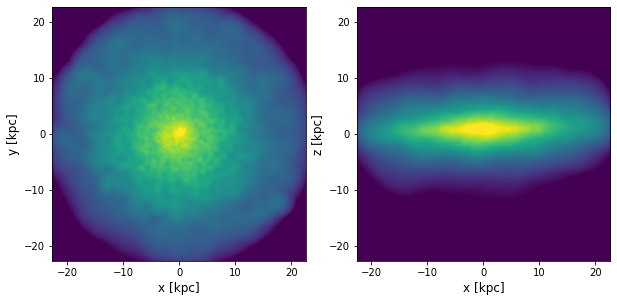

In [29]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

qv = QuickView(pos, mass, r="infinity", plot=False)
img = qv.get_image()
extent = qv.get_extent()
ax[0].imshow(img, extent=extent, vmin=5.5, vmax=8.8)
ax[0].set_xlabel("x [kpc]", fontsize=12)
ax[0].set_ylabel("y [kpc]", fontsize=12)

qv = QuickView(pos, mass, r="infinity", plot=False, t=90)
img = qv.get_image()
extent = qv.get_extent()
ax[1].imshow(img, extent=extent, vmin=5.5, vmax=8.8)
ax[1].set_xlabel("x [kpc]", fontsize=12)
ax[1].set_ylabel("z [kpc]", fontsize=12)

### EXAMPLE: view the components

In this example, we plot the decompotion output of `GCAbadi` model.

In [30]:
gcabadi = gc.GCAbadi()
gcabadi.decompose(galaxy)
gcabadi.labels_

array([ 1,  0,  1, ...,  0, -1, -1])

To select the particles you only need: 

In [31]:
label = gcabadi.labels_

(spheroid,) = np.where(label == 0)
(disk,) = np.where(label == 1)
(others,) = np.where(label == -1)

For **disk** particles

Text(0, 0.5, 'z [kpc]')

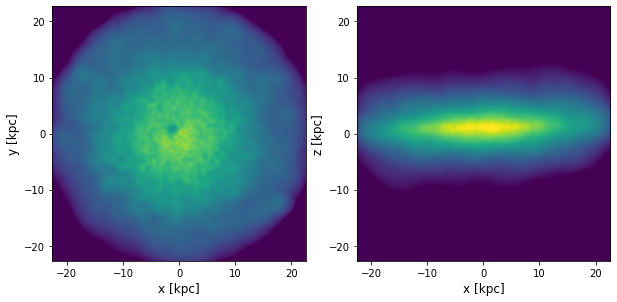

In [32]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

qv = QuickView(pos[disk], mass[disk], r="infinity", plot=False)
img = qv.get_image()
extent = qv.get_extent()
ax[0].imshow(img, extent=extent, vmin=5.5, vmax=8.8)
ax[0].set_xlabel("x [kpc]", fontsize=12)
ax[0].set_ylabel("y [kpc]", fontsize=12)

qv = QuickView(pos[disk], mass[disk], r="infinity", plot=False, t=90)
img = qv.get_image()
extent = qv.get_extent()
ax[1].imshow(img, extent=extent, vmin=5.5, vmax=8.8)
ax[1].set_xlabel("x [kpc]", fontsize=12)
ax[1].set_ylabel("z [kpc]", fontsize=12)

For **spheroid** particles:

Text(0, 0.5, 'z [kpc]')

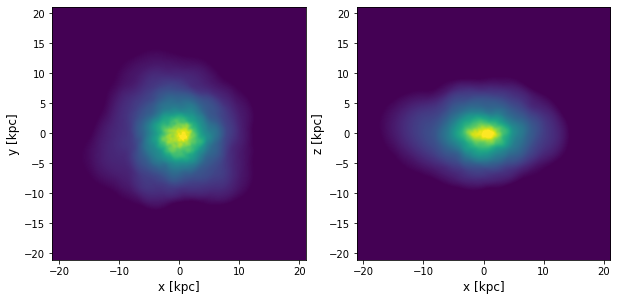

In [33]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

qv = QuickView(pos[spheroid], mass[spheroid], r="infinity", plot=False)
img = qv.get_image()
extent = qv.get_extent()
ax[0].imshow(img, extent=extent, vmin=5.5, vmax=8.8)
ax[0].set_xlabel("x [kpc]", fontsize=12)
ax[0].set_ylabel("y [kpc]", fontsize=12)

qv = QuickView(pos[spheroid], mass[spheroid], r="infinity", plot=False, t=90)
img = qv.get_image()
extent = qv.get_extent()
ax[1].imshow(img, extent=extent, vmin=5.5, vmax=8.8)
ax[1].set_xlabel("x [kpc]", fontsize=12)
ax[1].set_ylabel("z [kpc]", fontsize=12)

The label **others** is for all particles that are not classified as **spheroid** or **disk**